In [53]:
import random
import numpy as np
import pandas as pd

in_dist = [0.13, 0.17, 0.15, 0.25, 0.20, 0.10]
out_dist = [0.05, 0.15, 0.5, 0.2, 0.1]

in_acum = None
out_acum = None

def get_acum(dist):

    acum = []
    acum.append(in_dist[0])

    for i in range(1, len(dist)):
        acum.append(acum[i-1] + dist[i])

    return acum

def match_dist(x, dist):

    for i in range(len(dist)):
        if x < dist[i]:
            return i
        
    return len(dist)

def get_state(qi):

    rand_a = random.random()
    rand_b = random.random()

    ins = match_dist(rand_a, in_acum)
    out = match_dist(rand_b, out_acum) + 1

    qf = qi + ins - out
    qf = max(0, qf)

    return [rand_a, rand_b, qi, ins, out, qf]

in_acum = get_acum(in_dist)
out_acum = get_acum(out_dist)

In [54]:
curr = 0
sim = []

#n = 100
n = int(input('Days: '))

for i in range(n):
    line = get_state(curr)
    sim.append(line)
    curr = line[5]

df = pd.DataFrame(sim, 
                  columns = ['rand_a', 'rand_b', 'q0' , 'ins', 'outs' , 'qf']) 

print(df)

print()

print('Mean (d0): ', np.mean(df['q0']))
print('Mean (ins): ', np.mean(df['ins']))
print('Mean (outs): ', np.mean(df['outs']))
print('Mean (df): ', np.mean(df['qf']))

print()

print('Mean (rand_a): ', np.mean(df['rand_a']))
print('Mean (rand_b): ', np.mean(df['rand_b']))

          rand_a    rand_b  q0  ins  outs  qf
0       0.989294  0.230366   0    5     2   3
1       0.552774  0.964261   3    3     4   2
2       0.700578  0.641327   2    4     3   3
3       0.543419  0.435118   3    3     3   3
4       0.569189  0.507076   3    3     3   3
...          ...       ...  ..  ...   ...  ..
999995  0.428299  0.135361   7    2     2   7
999996  0.198447  0.305150   7    1     3   5
999997  0.857433  0.888983   5    4     4   5
999998  0.705163  0.872483   5    4     4   5
999999  0.219767  0.991370   5    1     5   1

[1000000 rows x 6 columns]

Mean (d0):  4.311643
Mean (ins):  2.518469
Mean (outs):  2.827881
Mean (df):  4.311644

Mean (rand_a):  0.49970129842854516
Mean (rand_b):  0.4995130478028912


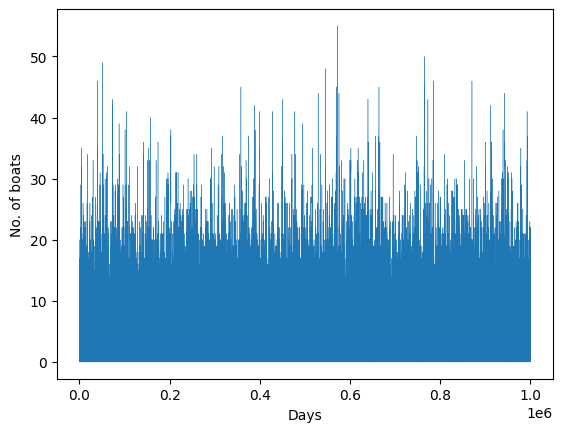

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(len(df)), df['qf'], linewidth=0.3)

plt.ylabel('No. of boats')
plt.xlabel('Days')

# plt.axis([0, n, 0, 20])

plt.show()  


Trend boats at port: 4.2139284700935296


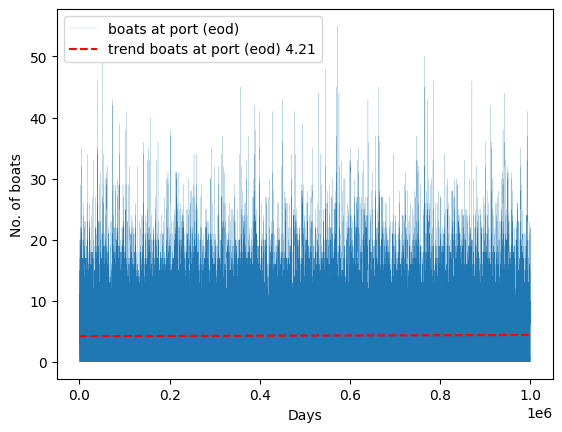

In [56]:
import matplotlib.pyplot as plt

x = range(len(df))
y = df['qf']

plt.plot(x, y, label='boats at port (eod)', linewidth=0.1)

plt.ylabel('No. of boats')
plt.xlabel('Days')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--", label=f'trend boats at port (eod) {z[1]:0.2f}')

print(f'Trend boats at port: {z[1]}')

plt.legend()

plt.show()  

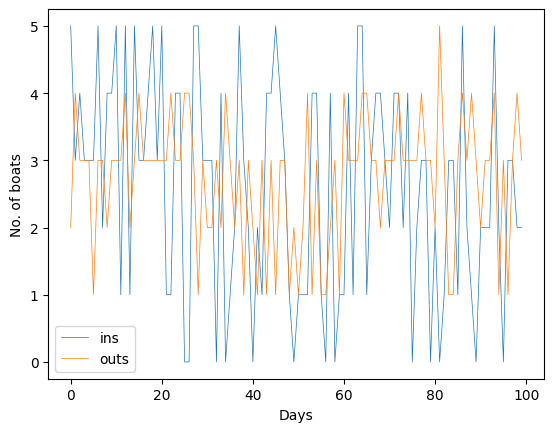

In [57]:
import matplotlib.pyplot as plt

x = range(100)

plt.plot(x, df['ins'][:100], label='ins', linewidth=0.5)
plt.plot(x, df['outs'][:100], label='outs', linewidth=0.5)

plt.ylabel('No. of boats')
plt.xlabel('Days')

plt.legend()

plt.show()  

In [58]:
#queries

#0. What was the minimum number of boats at the port?
print('Min boats at port: ', min(df['qf']))

#1. How many days did the port have 0 boats?
qf_0s = len(df[df['qf'] == min(df['qf'])])
print('Days with min boats: ', qf_0s)

#2. What was the percetage of days where the port had 0 boats?
print('Percentage of days with 0 boats on the port:', qf_0s / len(df))

#3. What was the maximum number of boats at the port?
print('Max boats at port: ', max(df['qf']))

#4. How many days did the port have the maximum number of boats?
print('Days with max boats: ', len(df[df['qf'] == max(df['qf'])]))

Min boats at port:  0
Days with min boats:  270226
Percentage of days with 0 boats on the port: 0.270226
Max boats at port:  55
Days with max boats:  2
